In [24]:
# import library for manipulate with data
import numpy as np
import pandas as pd

# library for create 3D plot from our data
import matplotlib.pyplot as plt

1, Load the data set
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [17]:
# import our data set
df = pd.read_csv('irisData.csv')
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


2, Plot the first 3 columns of the data set and target column in 3d scatter plot.

HINT: Use the target column as a hue for the points.

LINK: [https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)

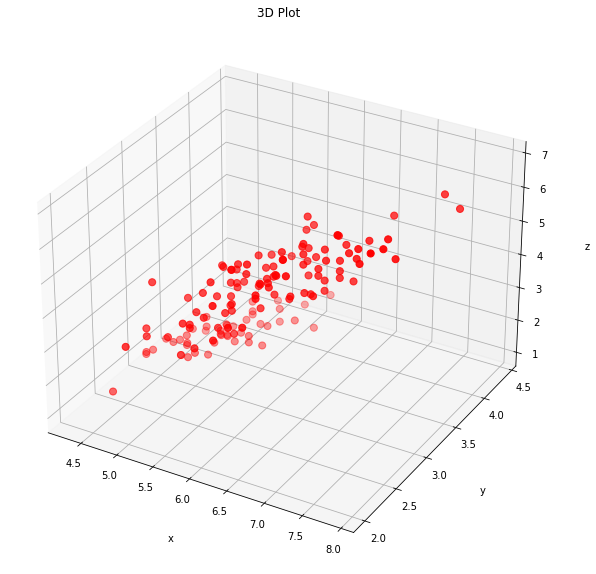

In [39]:
x = df['sepal.length']
y = df['sepal.width']
z = df['petal.length']

# set the size for diplaying 
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
ax.grid()

ax.scatter(x, y, z, c = 'r', s = 50)
ax.set_title('3D Plot')

# Set axes label
ax.set_xlabel('x', labelpad = 20)
ax.set_ylabel('y', labelpad = 20)
ax.set_zlabel('z', labelpad = 20)

plt.show()

3, Copy the implementation of the Principal Component Analysis algorithm from SMLH.

In [46]:
class myPCA: 
    def __init__(self, n_components: int = 2 , method : str = 'svd')-> None:
        ''' The constructor of the PCA algorithm. :param n_compoents: int, default = 2 
            The dimension to which the data will be reduced. :param method: str, default = ’svd’ 
            The method used by PCA to reduce the dimensionality of the data. ''' 
        self.__n_components = n_components 
        if method in ['svd', 'eigen']: 
            self.__method = method 
        else: raise ValueError(f"'{method}' is not a method implemented in this model") 
    def fit(self, X : 'np.array'): 
        ''' The fitting method. 
            :param X: np.array 
            The data on which we want to fit the PCA '''
        if self.__method == 'svd': 
            U, S, V = np.linalg.svd(X) 
            self.__V = V[:self.__n_components, :] 
        
        elif self.__method == 'eigen': 
            corr_mat = np.corrcoef(X.T)
            
            # Getting the eigenvectors and eigenvalues self.eig_vals, 
            self.eig_vecs = np.linalg.eig( corr_mat) 
            
            # Sorting the list of tuples (eigenvalue, eigenvector) 
            self.eig_pairs = [(np.abs(self.eig_vals[i]), 
            self.eig_vecs[:, i]) for i in range(len(self.eig_vals))] 
            self.eig_pairs.sort(key = lambda x: x[0], reverse = True) 
    
            # Calculating the explained ration 
            total = sum(self.eig_vals) 
            self.explained_variance_ratio = [(i / total) * 100 
    for i in sorted(self.eig_vals, reverse = True)] 
            self.cumulative_variance_ratio = np.cumsum( 
                self.explained_variance_ratio
            ) 
            
            # Creating the projection matrix 
            self.matrix_w = np.hstack(
                (self.eig_pairs[i][1].reshape(np.size(X, 1), 1) 
                for i in range(self.__n_components))) 
        return self 
    
    def transform(self, X : 'np.array') -> 'np.array': 
        ''' The transform function. 
        :param X: np.array The data that we must reduce. ''' 
        if self.__method == 'svd': 
            return X.dot(self.__V.T) 
        elif self.__method == 'eigen': 
            return X.dot(self.matrix_w)

4, Create an instance of the Scratch made PCA algorithm using the eigenvector algorithm.

In [51]:
# Sorting the list of tuples (eigenvalue, eigenvector). 
import numpy as np 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

cov_mat = np.cov(X)

eig_vals, eig_vecs = np.linalg.eig(corr_mat) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) 
             for i in range(len(eig_vals))] 
eig_pairs.sort(key=lambda x: x[0], reverse=True)

NameError: name 'X' is not defined

5, Create an instance of the Scratch made PCA algorithm using the SVD algorithm.

6, Create an instance of sklearn and implement a PCA algorithm.

7, Apply StandardScaler from sklearn on the data.

8, Train all created instances of PCA on the iris data.

9, Use each created instance of PCA to reduce the dimensionality of the data set to 2, creating in such a way 3 separated data sets.

10, Create a plot that combines 3 scatter plots and plots each of the result data sets in a separate window. Each window should related which version of the PCA was used.
HINT: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

11, Try to make a conclusion about what you see comparing the results of each algorithm and the 3d scatter plot that you made before.

12, Retrain a sklearn PCA model on the iris data set with n_components set to 1.

13, Create a line plot of the **explained_variance_ratio_.**

14, Try to make a conclusion based on that plot.